# Assessed Problems 4

Each two week block has an associated assessed problems sheet. There are always two questions with equal weighting.


- **All questions are marked in class by the demonstrators and can be completed in the blank assessed problems submission notebook.** You can have multiple attempts and demonstrators will give you feedback on your approach. You can often solve the problem in multiple ways but you will need to reach a required standard to receive a pass.

**It is expected that you attend all timetabled coding lab sessions assigned to you. This will assist in allowing enough time to speak to a demonstrator to get your attempt for question 1 graded.**

You should also submit working code for each problem via the canvas upload link provided. This will be used as a record of your work, and for plaigiarism and validation checks for question 2.

*** 

## Q1) Bisection method

<!-- -see *newman 6.15* -->

The bisection method is a very robust method for finding roots of a function (i.e. find x where f(x)=0). It is useful in the scenario where you know two values of the function, f(a) and f(b) where one f(a)>0 and f(b)<0 or vice versa. 

<div>
<img src="attachment:bisection.png" width="300"/>
</div>

The way it works is that we follow these steps iteratively:

1) Calculate c which is halfway between a and b
2) Calculate f(c)
3) If f(c) $\approx$ 0 then stop - f(x)=0 is given approximately by x=c
4) If f(c)>0 and f(a)>0, then replace a by c. If f(c)<0 and f(a)>0 then replace b by c.

Following the image above, you can see this will then continuously approach f(x)=0 and x=c.


a) Implement the bisection method as a function. You should be able to specify the following parameters: **[1 Mark]**
- `f` - objective function 
- `x1`, `x2` - the search window
- `max_iterations=1000` - an optional maximum number of iterations with a default value
- `atol=1E-10` - an optional absolute tolerance with a default value

b) Using the bisection method, find the roots of the following function. **[1 Mark]**

$$f(x) = (x+0.6) (x-1.73) (x-\pi)$$

![Polynomial](resources/poly3.png)



In [18]:
import numpy as np;

def BisectionMethod(f, x1, x2, max_iterations = 1000, atol = 1E-10):
    def RecursiveBisection(a, b, currentIteration):
        if (currentIteration < max_iterations):
            c = (a + b) / 2;
            fc = f(c);

            if (abs(fc) < atol):
                return (c);
            else:
                if (f(a) > 0):
                    if (fc > 0):
                        return (RecursiveBisection(c, b, currentIteration + 1));
                    else:
                        return (RecursiveBisection(a, c, currentIteration + 1));
                else:
                    if (fc > 0):
                        return (RecursiveBisection(a, c, currentIteration + 1));
                    else:
                        return (RecursiveBisection(c, b, currentIteration + 1));
        else:
            raise Exception("Maximum Iterations Reached");

    return (RecursiveBisection(x1, x2, 0));

# Function example: 
def f(x):
    return (x + 0.6) * (x - 1.73) * (x - np.pi);

# Example of leaving the last two parameters as default.
print (f"The first root of the equation is at {BisectionMethod(f, 1, -1)}.");

# Example of lower precision.
print (f"The second root of the equation is at {BisectionMethod(f, 2, 1, 100, 1E-5)}.");

# Example of higher precision
print (f"The third root of the equation is at {BisectionMethod(f, 3.5, 2.5, 10000, 1E-12)}.");


The first root of the equation is at -0.6000000000058208.
The second root of the equation is at 1.7299995422363281.
The third root of the equation is at 3.1415926535896688.


***

## Q2) Normalising a list of numbers

Normalising a set of numbers in this context means to apply a linear transformation such that all the numbers in a list 
 lie between 0 and 1, with ordered maintained.

X = `[10, 1, 19, -7, 14, -3]`

a) Try this task first using the built in functions `min` and `max`. **[1 Mark]**

b) Now try again but write your own code to find the minimum and maximum values. **[1 Mark]**



In [25]:
# Part a
import numpy as np

def NormaliseList(list):
    array = np.array(list);
    positiveArray = array - min(array);
    scaledArray = positiveArray / max(positiveArray);
    return scaledArray;

X = [10, 1, 19, -7, 14, -3];

print (NormaliseList(X))

[0.65384615 0.30769231 1.         0.         0.80769231 0.15384615]


In [28]:
# Part b
import numpy as np

def findMaximum(array):
    currentMaximum = array[0];

    for integer in array:
        if (integer > currentMaximum):
            currentMaximum = integer;

    return currentMaximum;

def findMinimum(array):
    currentMinimum = array[0];
    
    for integer in array:
        if (integer < currentMinimum):
            currentMinimum = integer;

    return currentMinimum;

def NormaliseList(list):
    array = np.array(list);
    positiveArray = array - findMinimum(array);
    scaledArray = positiveArray / findMaximum(positiveArray);
    return scaledArray;

X = [10, 1, 19, -7, 14, -3];

print (NormaliseList(X))

[0.65384615 0.30769231 1.         0.         0.80769231 0.15384615]


*** 

## Q3) The Madelung constant

<!-- newman ex2.9 -->


In condensed matter physics the Madelung constant gives the total electric potential felt by an atom in a solid. It depends on the charges on the other atoms nearby and their locations. Consider for instance solid sodium chloride (table salt). The sodium chloride crystal has atoms arranged on a cubic lattice, but with alternating sodium and chlorine atoms, the sodium ones having a single positive charge $+e$ and the chlorine ones a single negative charge $-e$, where $e$ is the charge on the electron. If we label each position on the lattice by three integer coordinates $(i, j, k)$, then the sodium atoms fall at positions where $i+j+k$ is even, and the chlorine atoms at positions where $i+j+k$ is odd.

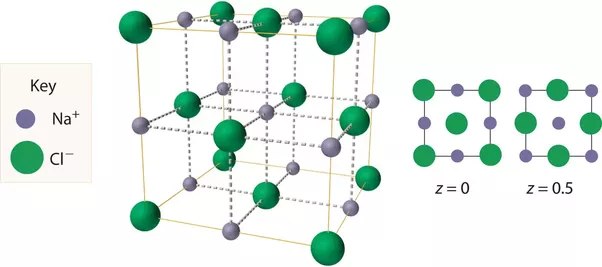

Consider a sodium atom at the origin, $i=j=k=0$, and let us calculate the Madelung constant. If the spacing of atoms on the lattice is $a$, then the distance from the origin to the atom at position $(i, j, k)$ is

$$
\sqrt{(i a)^2+(j a)^2+(k a)^2}=a \sqrt{i^2+j^2+k^2},
$$

and the potential at the origin created by such an atom is

$$
V(i, j, k)= \pm \frac{e}{4 \pi \epsilon_0 a \sqrt{i^2+j^2+k^2}},
$$

with $\epsilon_0$ being the permittivity of the vacuum and the sign of the expression depending on whether $i+j+k$ is even or odd. The total potential felt by the sodium atom is then the sum of this quantity over all other atoms. Let us assume a cubic box around the sodium at the origin, with $L$ atoms in all directions. Then

$$
V_{\text {total }}=\sum_{\substack{i, j \in=-L \\ \text { not } i=j=k=0}}^L V(i, j, k)=\frac{e}{4 \pi \varepsilon_0 a} M,
$$

where $M$ is the Madelung constant, at least approximately-technically the Madelung constant is the value of $M$ when $L \rightarrow \infty$, but one can get a good approximation just by using a large value of $L$.

a) Write a program to calculate and print the Madelung constant for sodium chloride. Use as large a value of $L$ as you can, while still having your program run in reasonable time-say in a minute or less. **[1 Mark]**

In [27]:
import numpy as np;

e = 1.60217663E-19; # magnitude of charge of an electron
epsilon0 = 8.8541878128E-12; # permittivity of free space
a = 0.282E-9; # atomic spacing for salt

L = 176; # The length of the cube, divided by 2, rounded down.
         # L = 176 runs the code for 1m 0.5s on my home computer.

VTotal = 0;
for I in range(0, 2 * L + 1):
    i = I - L;

    for J in range(0, 2 * L + 1):
        j = J - L;

        for K in range(0, 2 * L + 1):
            k = K - L;

            if (not(i == 0 and j == 0 and k == 0)):
                sign = (-1) ** ((i + j + k) % 2 + 1);
                V = sign * (e / (4 * np.pi * epsilon0 * a * np.sqrt(i ** 2 + j ** 2 + k ** 2)));

                VTotal += V;

M = VTotal / (e / (4 * np.pi * epsilon0 * a));

print (f"The Madelung Constant is aproximately equal to {M}.");

The Madelung Constant is aproximately equal to 1.7442934883133068.
